<a href="https://colab.research.google.com/github/vijaythapakdata/Loan-Status-Prediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [61]:
loan_data=pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [62]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
loan_data.shape

(614, 13)

In [64]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [66]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [67]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
loan_data=loan_data.dropna()

In [69]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
loan_data["Gender"].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


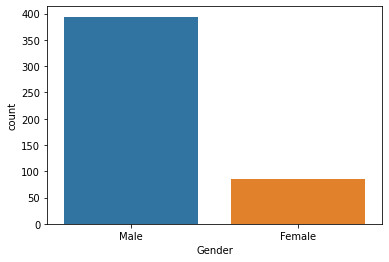

In [70]:
sns.countplot("Gender",data=loan_data)
plt.show()

In [71]:
loan_data["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [72]:
loan_data = loan_data.replace(to_replace='3+', value=4)

In [73]:
loan_data["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


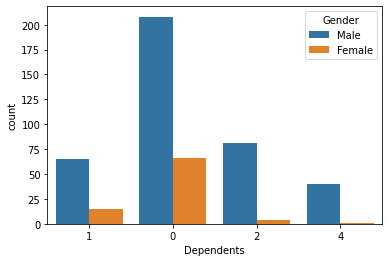

In [74]:
sns.countplot("Dependents",hue="Gender",data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


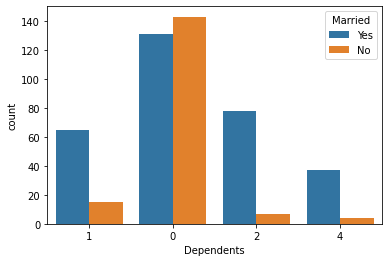

In [75]:
sns.countplot("Dependents",hue="Married",data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


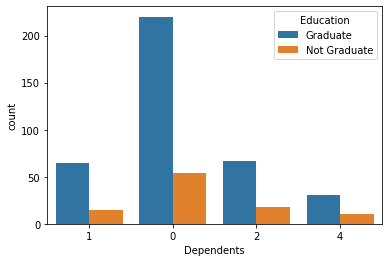

In [76]:
sns.countplot("Dependents",hue="Education",data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


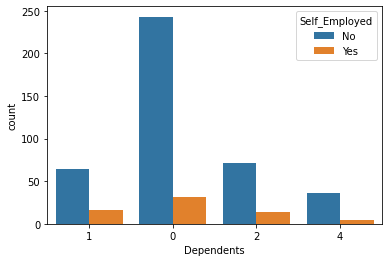

In [77]:
sns.countplot("Dependents",hue="Self_Employed",data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


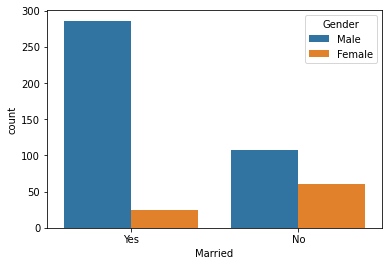

In [78]:
sns.countplot("Married",hue="Gender",data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


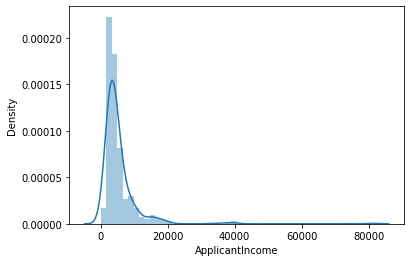

In [79]:
# Applicant Income distribution
sns.distplot(loan_data["ApplicantIncome"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


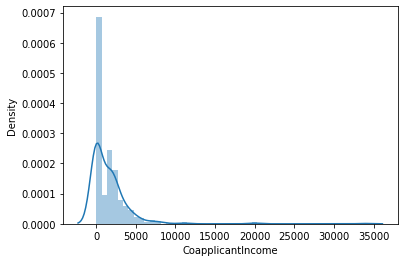

In [24]:
#coapplicant income distribution
sns.distplot(loan_data["CoapplicantIncome"])
plt.show()

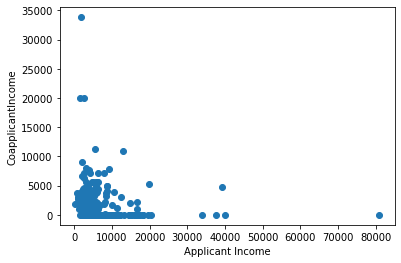

In [80]:
#relation between ApplicantIncome and CoapplicantIncome
plt.scatter(x=loan_data["ApplicantIncome"],y=loan_data["CoapplicantIncome"])
plt.xlabel("Applicant Income")
plt.ylabel("CoapplicantIncome")
plt.show()

In [81]:
loan_data["Credit_History"].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


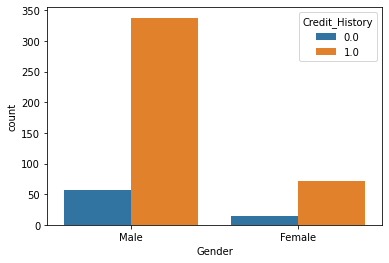

In [82]:
sns.countplot("Gender",hue="Credit_History",data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


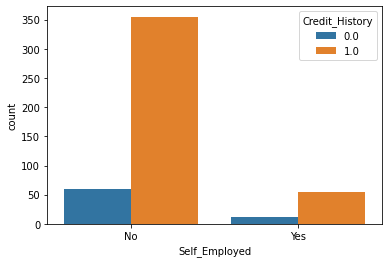

In [83]:
sns.countplot("Self_Employed",hue="Credit_History",data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


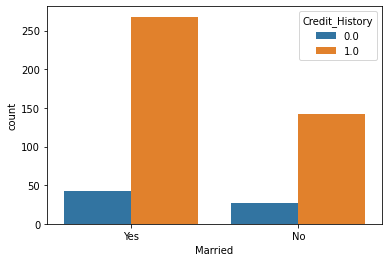

In [85]:
sns.countplot("Married",hue="Credit_History",data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


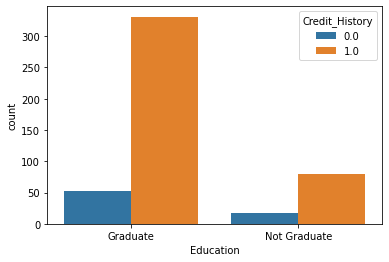

In [86]:
sns.countplot("Education",hue="Credit_History",data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


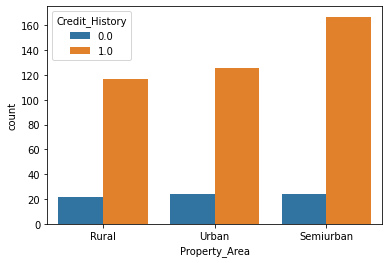

In [87]:
sns.countplot("Property_Area",hue="Credit_History",data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


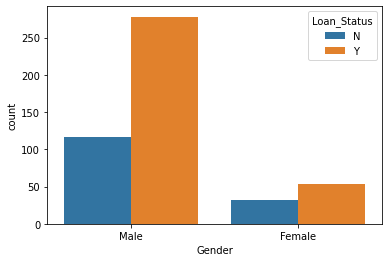

In [88]:
#Loan Status w.r.t Gender
sns.countplot("Gender",hue="Loan_Status",data=loan_data)
plt.show()

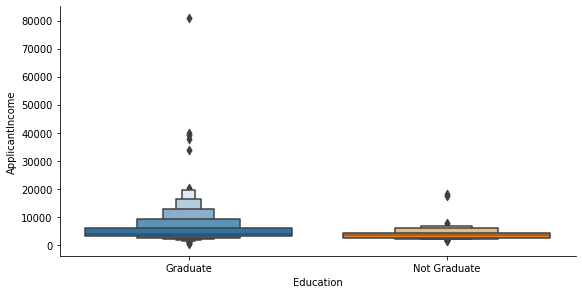

In [89]:
#find the relationship between Education and ApplicantIncome
sns.catplot(y="ApplicantIncome",x="Education",data=loan_data.sort_values("ApplicantIncome",ascending=False),aspect=2,height=4,kind="boxen")
plt.show()

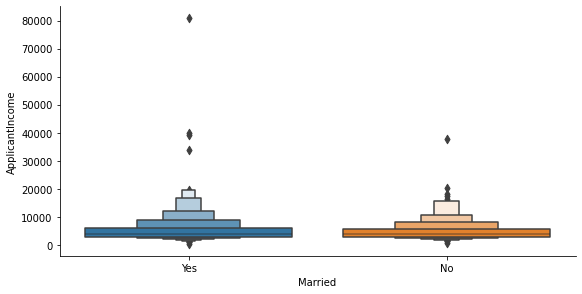

In [36]:
sns.catplot(y="ApplicantIncome",x="Married",data=loan_data.sort_values("ApplicantIncome",ascending=False),aspect=2,height=4,kind="boxen")
plt.show()

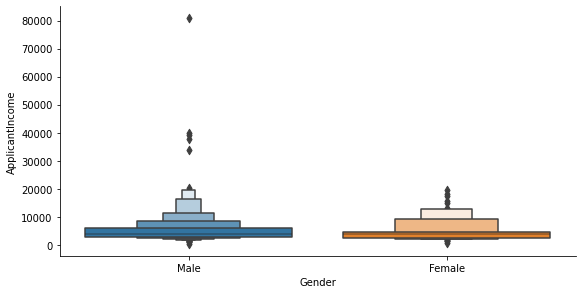

In [90]:
sns.catplot(y="ApplicantIncome",x="Gender",data=loan_data.sort_values("ApplicantIncome",ascending=False),aspect=2,height=4,kind="boxen")
plt.show()

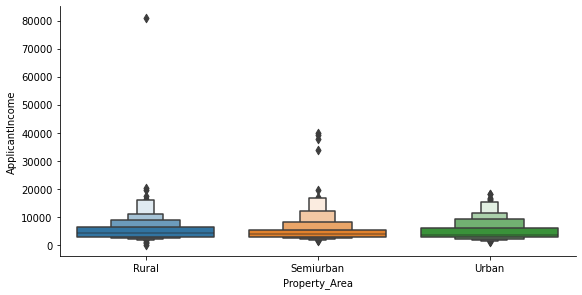

In [91]:
sns.catplot(y="ApplicantIncome",x="Property_Area",data=loan_data.sort_values("ApplicantIncome",ascending=False),aspect=2,height=4,kind="boxen")
plt.show()

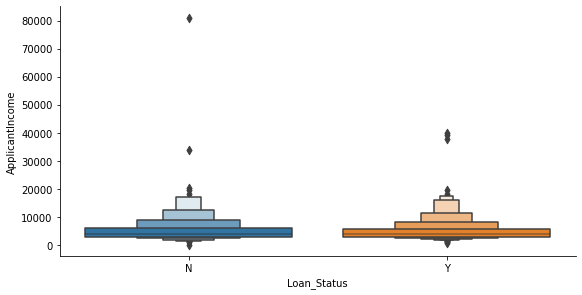

In [92]:
sns.catplot(y="ApplicantIncome",x="Loan_Status",data=loan_data.sort_values("ApplicantIncome",ascending=False),aspect=2,height=4,kind="boxen")
plt.show()

In [93]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Deal With Categorical Data
1. Gender
2. Married
3. Education
4. Dependents(Already Encoded)
5. Self_Employed
6. Property_Area
7. Loan_status(Target Variable)

In [94]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [44]:
encoder=LabelEncoder()

In [95]:
loan_data["Gender"]=encoder.fit_transform(loan_data["Gender"])
loan_data["Married"]=encoder.fit_transform(loan_data["Married"])
loan_data["Education"]=encoder.fit_transform(loan_data["Education"])
loan_data["Self_Employed"]=encoder.fit_transform(loan_data["Self_Employed"])
loan_data["Property_Area"]=encoder.fit_transform(loan_data["Property_Area"])
loan_data["Loan_Status"]=encoder.fit_transform(loan_data["Loan_Status"])

In [96]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


Loan_Status
0. No
1. Yes

In [97]:
X=loan_data.drop(["Loan_ID","Loan_Status"],axis=1)
Y=loan_data["Loan_Status"]

In [98]:
print(X)

     Gender  Married  ... Credit_History  Property_Area
1         1        1  ...            1.0              0
2         1        1  ...            1.0              2
3         1        1  ...            1.0              2
4         1        0  ...            1.0              2
5         1        1  ...            1.0              2
..      ...      ...  ...            ...            ...
609       0        0  ...            1.0              0
610       1        1  ...            1.0              0
611       1        1  ...            1.0              2
612       1        1  ...            1.0              2
613       0        0  ...            0.0              1

[480 rows x 11 columns]


In [99]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [100]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [101]:
print(X.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(480, 11) (384, 11) (96, 11) (384,) (96,)


In [ ]:
classifier=SVC()

In [108]:
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Model Evaluation

In [109]:
train_prediction=classifier.predict(x_train)
train_accuracy=accuracy_score(y_train,train_prediction)

In [110]:
print("The accuracy score of training data is ",train_accuracy)

The accuracy score of training data is  0.8151041666666666


In [111]:
test_prediction=classifier.predict(x_test)

test_accuracy=accuracy_score(y_test,test_prediction)

In [112]:
print("The accuracy score of test data is ",test_accuracy)

The accuracy score of test data is  0.7083333333333334


Try this to logistics regression

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
regression=LogisticRegression()

In [115]:
regression.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
train_prediction=regression.predict(x_train)
train_accuracy=accuracy_score(y_train,train_prediction)

In [118]:
print("The accuracy score of training data ",train_accuracy)

The accuracy score of training data  0.8177083333333334


In [119]:
test_prediction=regression.predict(x_test)
test_accuracy=accuracy_score(y_test,test_prediction)

print("The accuracy score of test data is ",test_accuracy)

The accuracy score of test data is  0.75


Check with random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
train_prediction=classifier.predict(x_train)
train_accuracy=accuracy_score(y_train,train_prediction)
print("The accuracy score of training data is ",train_accuracy)

The accuracy score of training data is  1.0


In [123]:
test_prediction=classifier.predict(x_test)
test_accuracy=accuracy_score(y_test,test_prediction)

print("The accuracy score of test data is ",test_accuracy)

The accuracy score of test data is  0.75


Try this With DecisionTreeClassifier

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
classifier=DecisionTreeClassifier()

In [126]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [127]:
train_prediction=classifier.predict(x_train)
train_accuracy=accuracy_score(y_train,train_prediction)
print("The accuracy score of training data is ",train_accuracy)

The accuracy score of training data is  1.0


In [128]:
test_prediction=classifier.predict(x_test)
test_accuracy=accuracy_score(y_test,test_prediction)

print("The accuracy score of test data is ",test_accuracy)

The accuracy score of test data is  0.7083333333333334
